In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Moyenne Par Mois

In [2]:
tab = pd.read_csv('../csv/tableau_final.csv')

tab['Year/Month'] = tab["Date"].str[8:10] + "/" + tab["Date"].str[3:5]

tab = np.round(tab.groupby(['variable', 'Year/Month'], as_index=False)['value'].mean(), decimals = 2)

tab.head()

,variable,Year/Month,value
0,Brent (EUR/barrel),15/03,NaN
1,Brent (EUR/barrel),15/04,NaN
2,Brent (EUR/barrel),15/05,NaN
3,Brent (EUR/barrel),15/06,NaN
4,Brent (EUR/barrel),15/07,NaN


## Remplissage des NaN

In [3]:
tab = tab.fillna(method='bfill')

tab.head()

,variable,Year/Month,value
0,Brent (EUR/barrel),15/03,46.06
1,Brent (EUR/barrel),15/04,46.06
2,Brent (EUR/barrel),15/05,46.06
3,Brent (EUR/barrel),15/06,46.06
4,Brent (EUR/barrel),15/07,46.06


## Affichage

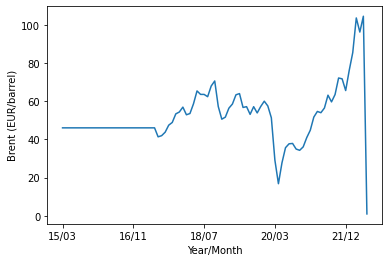

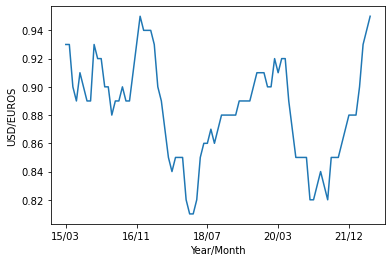

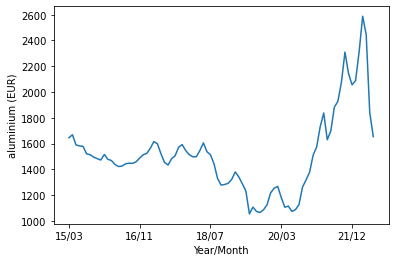

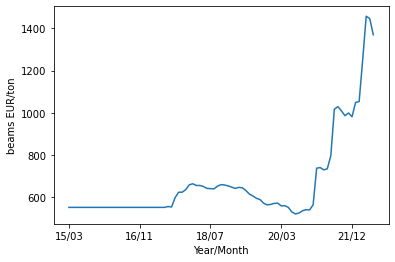

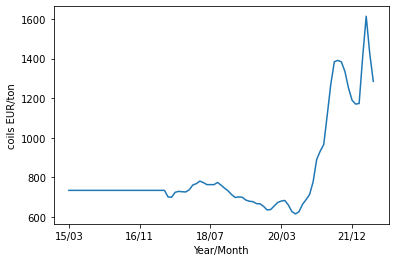

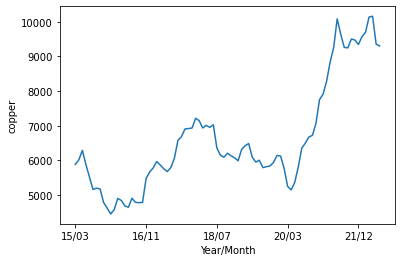

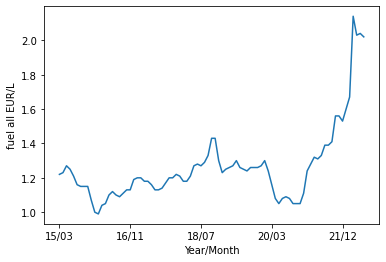

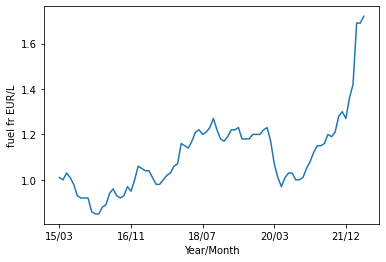

In [4]:
for elem in tab['variable'].unique():
    tab_to_plot = tab[tab['variable'] == elem].plot(x='Year/Month', y='value', legend=False)
    plt.ylabel(elem)

## Enregistrement des données

In [21]:
tab.to_csv(r'../csv/tableau_by_month.csv', index = True, header = True)